In [8]:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from src.models.classical_ml import ClassicalML

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import sys
import os

# Add project root path
project_root = os.path.abspath("..")
sys.path.append(project_root)


		"Logistic Regression":
        "Random Forest Classifier": 
        "Support Vector Machine":
        "K-Nearest Neighbors":
        "Decision Tree Classifier":
        "Naive Bayes Classifier":

In [40]:
import pandas as pd

df = pd.read_csv(
    r'D:\AIML\Assignment\Git_repos\SM\Twitter_Sentiment_Classification\data\clean_text.csv',
    encoding="utf-8"
)



In [41]:
df.head()

,lable,clean_twits
0,0,is upset that he cant update his facebook by t...
1,0,i dived many times for the ball managed to sav...
2,0,my whole body feels itchy and like its on fire
3,0,no its not behaving at all im mad why am i her...
4,0,not the whole crew


In [42]:
# Define Function for get information about dataset or data

def data_info(datafram):
    summary = pd.DataFrame({
		"Column": df.columns,
        "Data Type": df.dtypes.values,
        "Missing Values": df.isnull().sum().values,
        "Unique Values": df.nunique().values
	})
    return summary

In [43]:
# Check Information 
summary_df = data_info(df)
summary_df

,Column,Data Type,Missing Values,Unique Values
0,lable,int64,0,2
1,clean_twits,object,3597,1519678


In [44]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   lable        1599999 non-null  int64 
 1   clean_twits  1596402 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
None
              lable
count  1.599999e+06
mean   2.000001e+00
std    2.000001e+00
min    0.000000e+00
25%    0.000000e+00
50%    4.000000e+00
75%    4.000000e+00
max    4.000000e+00


In [45]:
print(df.shape)

(1599999, 2)


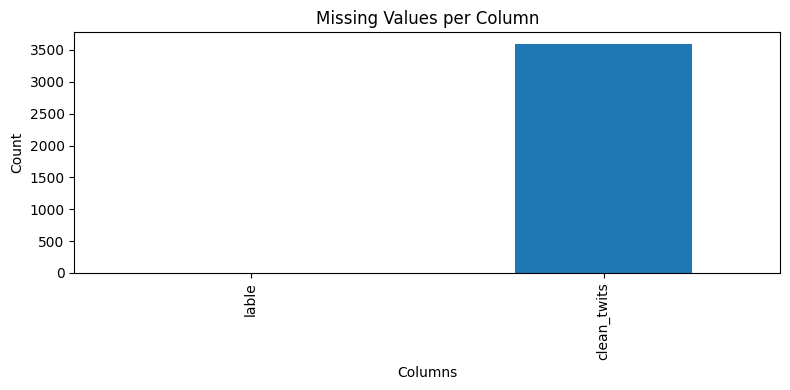

In [46]:
plt.figure(figsize=(8,4))
df.isnull().sum().plot(kind='bar')
plt.title("Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [47]:
df.dropna(inplace=True)

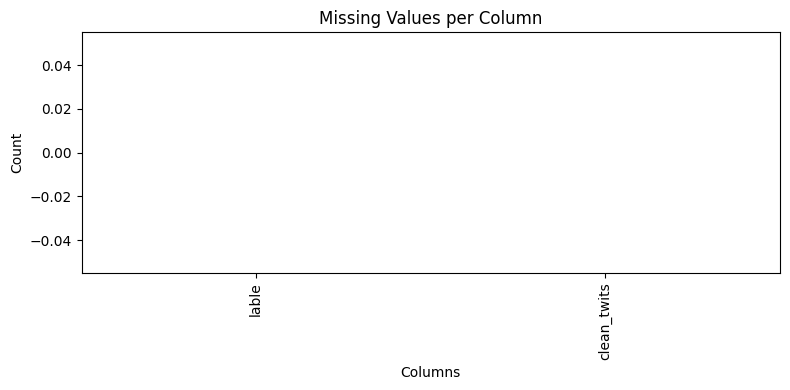

In [48]:
plt.figure(figsize=(8,4))
df.isnull().sum().plot(kind='bar')
plt.title("Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# Build A Losgistic Regression Model

In [49]:
X = df['clean_twits']

y = df['lable']

In [50]:
print(X.shape, y.shape)

(1596402,) (1596402,)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [135]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logreg', LogisticRegression(max_iter=2000))
])

In [ ]:
param_grid = {
    'tfidf__max_features': [10000, 15000, 20000, 25000],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__min_df': [2, 3, 5],
    'logreg__C': [0.1, 0.5, 1, 2, 3],
    'logreg__class_weight': [None, 'balanced']
}


In [ ]:
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

In [138]:
grid.fit(X_train, y_train)


Fitting 3 folds for each of 240 candidates, totalling 720 fits


,estimator,Pipeline(step..._iter=2000))])
,param_grid,"{'logreg__C': [0.1, 0.5, ...], 'logreg__class_weight': [None, 'balanced'], 'tfidf__max_features': [10000, 15000, ...], 'tfidf__min_df': [2, 3, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,input,'content'


In [141]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

print("Best Params:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Params: {'logreg__C': 2, 'logreg__class_weight': None, 'tfidf__max_features': 25000, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)}
Accuracy: 0.8139663807116615

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81    159668
           4       0.81      0.82      0.82    159613

    accuracy                           0.81    319281
   macro avg       0.81      0.81      0.81    319281
weighted avg       0.81      0.81      0.81    319281


Confusion Matrix:
 [[128229  31439]
 [ 27958 131655]]


In [142]:
best_model = grid.best_estimator_
best_params = grid.best_params_

print("\nBest Tuned Parameters:")
for k, v in best_params.items():
    print(f"{k}: {v}")


Best Tuned Parameters:
logreg__C: 2
logreg__class_weight: None
tfidf__max_features: 25000
tfidf__min_df: 2
tfidf__ngram_range: (1, 2)


In [143]:
# Model with Best Parameter 
max_features = 25000
ngram_range = (1, 2)
min_df = 3
c = 2
w = 'balanced'

In [158]:
# Train Accuracy

final_model = grid.best_estimator_

y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train,y_pred)

In [146]:
# Validation accuracy
y_val_pred = best_model.predict(X_test)
val_acc = accuracy_score(y_test, y_val_pred)


In [147]:
print(f"Train Accuracy: {train_acc:.4f}\nValidation Accuracy: {val_acc:.4f}")

Train Accuracy: 0.8237
Validation Accuracy: 0.8140


In [156]:
import pickle
# 8. Save model (pickle)
# ---------------------------
with open("D:\AIML\Assignment\Git_repos\SM\Twitter_Sentiment_Classification\model\ml_model.pkl", "wb") as f:
    pickle.dump(best_model, f)




In [161]:
import nbformat

notebook_path = r"D:\AIML\Assignment\Git_repos\SM\Twitter_Sentiment_Classification\notebooks\classic_ml.ipynb"

try:
    nb = nbformat.read(notebook_path, as_version=4)
    print("Notebook is valid JSON")
except Exception as e:
    print("Error:", e)


Notebook is valid JSON


In [2]:
import sys
import os

# Add project root path
project_root = os.path.abspath("..")
sys.path.append(project_root)
from src.models.classical_ml import ClassicalML

In [52]:
ml = ClassicalML(model_name=None, pipeline=pipeline, param_grid=param_grid)


In [56]:
ml.train(X_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


In [36]:
ml.train(X_train,y_train)

In [9]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logreg', LogisticRegression(max_iter=2000))
])


param_grid = {
    'tfidf__max_features': [10000, 15000, 20000, 25000],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__min_df': [2, 3, 5],
    'logreg__C': [0.1, 0.5, 1, 2, 3],
    'logreg__class_weight': [None, 'balanced']
}


grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)